# <a>Projeto 2 - Regressão usando Scikit Learn</a>

*Let's Data - Jornada Cientista da Dados*

## <a> Motivação </a>

O cientista de dados é contratado para resolver problemas!!! E um dos problemas mais comuns no mundo real são as regressões. Um problema pode ser modelado como sendo uma regressão quando queremos prever um número real, ou, mais tecnicamente: quando queremos prever uma variável contínua.

A ideia desse projeto é iniciar no mundo de machine learning, com separação de bases, avaliação de métricas, uso de cross validation e, finalmente, criação e comparação de modelos preditivos utilizando a biblioteca scikit learn.

## <a> Objeto de Estudo </a>

Vamos trabalhar com informações de planos de saúde! A área médica e de seguradoras de saúde utiliza muito as técnicas de ciência de dados e machine learning para avaliar risco dos seus segurados/pacientes. Vamos utilizar uma base de dados do livro ["Machine Learning with R"](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-r) de Brett Lantz, disponível [aqui](https://github.com/stedy/Machine-Learning-with-R-datasets).

O problema que queremos solucionar é prever os gastos com planos de saúde de acordo com as características do segurado. Poderia ser um problema interessante tanto para os segurados (para saber quais características tornam seu plano mais caro ou barato), quanto para seguradoras (para que mantenha suas contas equilibradas e saiba os segurados que devem ter um preço mais alto/baixo).


Bora de mão na massa?

In [ ]:
# %pip install scikit-learn seaborn

In [9]:
# Importando as bibliotecas para leitura dos dados e criação de gráficos
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


# Configurando pandas para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = None

# Configurando pandas para não mostrar notação científica para números
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [10]:
# Lendo os dados do seguro
df_seguro = pd.read_csv('./data/insurance.csv')
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [11]:
# Avaliando a quantidade de linhas e colunas
df_seguro.shape

(1338, 7)

In [12]:
# Avaliando os tipos
df_seguro.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [13]:
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### <a> Criando um dicionário para as colunas </a>

In [14]:
# Criando um dicionário com explicações para cada coluna
descricoes_das_colunas = {
    'age': 'Idade do beneficiário',
    'sex': 'Sexo do beneficiário (male: masculino, female: feminino)',
    'bmi': 'Índice de Massa Corporal (BMI) do beneficiário, uma medida da gordura corporal com base na altura e no peso',
    'children': 'Número de dependentes cobertos pelo plano de saúde',
    'smoker': 'Indicador se o beneficiário é fumante (yes: sim, no: não)',
    'region': 'Região de residência do beneficiário (noroeste, sudoeste, sudeste, nordeste)',
    'charges': 'Custo anual do seguro de saúde cobrado ao beneficiário'
}

# Convertendo o dicionário para um DataFrame
dictionary_df = pd.DataFrame(list(descricoes_das_colunas.items()), columns=['Coluna', 'Descrição'])

# Salvando o DataFrame em um arquivo CSV
dictionary_csv_caminho = 'data/dictionary.csv'
dictionary_df.to_csv(dictionary_csv_caminho, index=False)

df_dict = pd.read_csv('data/dictionary.csv')
df_dict

,Coluna,Descrição
0,age,Idade do beneficiário
1,sex,"Sexo do beneficiário (male: masculino, female: feminino)"
2,bmi,"Índice de Massa Corporal (BMI) do beneficiário, uma medida da gordura corporal com base na altura e no peso"
3,children,Número de dependentes cobertos pelo plano de saúde
4,smoker,"Indicador se o beneficiário é fumante (yes: sim, no: não)"
5,region,"Região de residência do beneficiário (noroeste, sudoeste, sudeste, nordeste)"
6,charges,Custo anual do seguro de saúde cobrado ao beneficiário


## <a> Começando com estatística descritiva </a>

Conhecer bem as medidas estatísticas, de tendência central, dispersão, separatrizes, distribuições, é essencial para conhecermos melhor os dados em que estamos trabalhando. Qual a distribuição da idade? Índice de massa corporal? E a variável target?

In [15]:
df_seguro.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


<Axes: xlabel='age', ylabel='Count'>

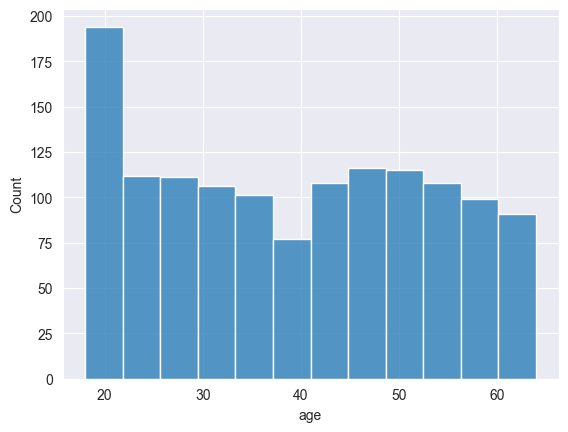

In [16]:
# Analisando as distribuições das idades
sns.set_style('darkgrid')
plt.tight_layout()

sns.histplot(data=df_seguro, x='age')

<Axes: xlabel='bmi', ylabel='Count'>

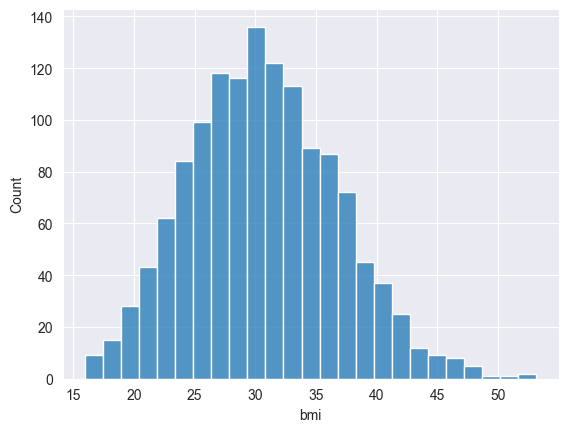

In [17]:
# Analisando as distribuições do índice de massa corporal
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_seguro, x='bmi')

<Axes: xlabel='children', ylabel='count'>

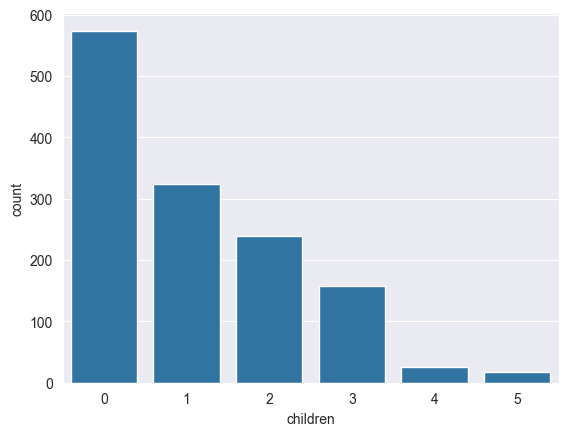

In [19]:
# Analisando as quantidades de dependentes
sns.set_style("darkgrid")
plt.tight_layout()

sns.countplot(data=df_seguro, x='children')


<Axes: xlabel='charges', ylabel='Count'>

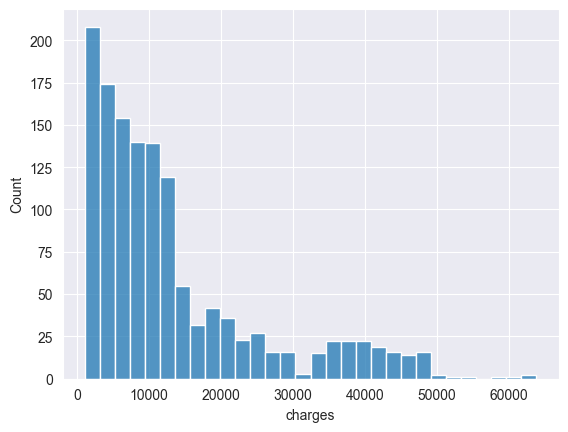

In [20]:
# Analisando a variável target: valor anual do seguro
sns.histplot(data=df_seguro['charges'])

## <a> Relação entre as features e a variável target </a>

Uma análise interessante é avaliar relações entre as variáveis preditoras com a target. Vamos analisar as dispersões das variáveis preditoras com o valor do seguro.

In [ ]:
# O pairplot faz gráficos de dispersão para os pares de variáveis (incluindo a target)
# Na diagonal principal ele mostra o histograma
sns.pairplot(data=df_seguro)

Fica evidente uma correlação positiva entre idade e as cobranças de planos de saúde (age x charges). Provavelmente será uma variável de importância no modelo preditivo

## <a> Codificação de Variáveis Categóricas </a>

Lembrando que os modelos de machine learning não sabem o que são categorias em sua maioria, devemos, portanto, codificar as variáveis de sexo, fumante e localização.

In [ ]:
df_seguro.head()

In [ ]:
# Como somente temos variáveis nominais, vamos utilizar One Hot Encoder
# Podemos utilizar o get_dummies do pandas, ou o OneHotEncoder do scikit learn
# Para variáveis somente com duas classes (sex e smoker), podemos fazer um mapeamento direto

df_seguro['female'] = df_seguro['sex'].map({'female': 1, 'male': 0})
df_seguro['smoker'] = df_seguro['smoker'].map({'yes': 1, 'no': 0})
df_seguro.head()

In [ ]:
df_seguro = df_seguro.drop('sex', axis=1)
df_seguro.head()

In [ ]:
df_seguro['region'].unique()

In [ ]:
# Para as regiões vamos usar OHE
colunas_regiao = pd.get_dummies(df_seguro['region'], drop_first=True)
colunas_regiao.head()

In [ ]:
# concat, concatena pandas dataframes, axis=1 ele junta colunas, axis=0 junta linhas
pd.concat([df_seguro, colunas_regiao], axis=1).head()

In [ ]:
df_seguro = pd.concat([df_seguro, colunas_regiao], axis=1)
df_seguro = df_seguro.drop('region', axis=1)
df_seguro.head()

## <a> Determinando quem são variáveis preditoras e variável target </a>

Ou... definindo X e y. É a forma mais usual de chamar as variáveis.

In [ ]:
df_seguro.columns

In [ ]:
X = df_seguro.drop('charges', axis=1) # tirando a variável dependente
y = df_seguro[['charges']] # extraindo a variável dependente

In [ ]:
# Variáveis preditoras (ou independentes ou, features)
X.head()

In [ ]:
# Variável dependente, ou target, ou label (ah, vcs entenderam :)
y.head()

## <a> Separação de bases </a>

Vamos separar logo essas bases?? Isso evita data leakage porque vamos fazer feature scaling, por exemplo, e tais transformações deve ser realizadas DEPOIS do split (separação).

In [ ]:
# A função que separa nossa base em treino e teste! 
# Lembrando que faremos cross validation com a base de treino
from sklearn.model_selection import train_test_split

In [ ]:
# Devolve uma tupla com 4 elementos: X de treino, X de teste, y de treino, y de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, # preditoras 
                                                        y, # target
                                                        test_size=.2, 
                                                        random_state=42)

# Vamos ver quantas linhas ficamos com treino e teste
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

In [ ]:
1070/1338

## <a> Feature Scaling </a>

Como usaremos pelo menos um modelo linear, é importante realizar scaling das features para mantê-las numa mesma escala de grandeza. Vamos de MinMaxScaler?

In [ ]:
df_seguro.describe()

In [ ]:
# Normalização - MinMaxScaler, Padronização - StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Criar scaler
scaler = MinMaxScaler()

In [ ]:
type(scaler)

In [ ]:
scaler

In [ ]:
colunas = X_treino.columns

# Parte importante!! Fit no treino! Transform no treino e teste
X_treino[colunas] = scaler.fit_transform(X_treino)
X_teste[colunas] = scaler.transform(X_teste)

X_treino.shape, X_teste.shape

In [ ]:
X_treino.head()

In [ ]:
X_treino.describe()

In [ ]:
X_teste.describe()

## <a> Analisando a correlação entre variáveis </a>

Quando utilizamos modelos lineares, é importante saber se as variáveis preditoras guardam alguma colinearidade. Caso ocorra, devemos remover uma das variáveis para que o modelo não seja afetado. 

In [ ]:
figura, graficos = plt.subplots(figsize=(10, 8))
corr = df_seguro.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
            square=True, ax=graficos)

## <a> Analisando se existem dados faltantes </a>

In [ ]:
# isnull busca quem é nulo (dados faltantes)
df_seguro.isnull().sum()

## <a> Vamos de Machine Learning? </a>

Primeiro modelo que vamos treinar é a regressão linear. Lembrando que vamos utilizar cross validation para evitar overfit e ter uma base de comparação para outros modelos

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
# Criando o estimador, algorimo, modelo, preditor, regressor (virge, que tanto de nome!)
regressao_linear = LinearRegression()

# Vamos treinar utilizando cross validation
valores_rmse_rl = cross_val_score(estimator=regressao_linear, 
                                  X=X_treino, 
                                  y=y_treino, 
                                  cv=10, # 10-fold CV
                                  scoring='neg_root_mean_squared_error')
valores_rmse_rl

In [ ]:
len(valores_rmse_rl)

In [ ]:
valores_rmse_rl = valores_rmse_rl * -1
valores_rmse_rl

In [ ]:
media_rmse_rl = valores_rmse_rl.mean()
media_rmse_rl

### Vamos tentar agora uma árvore de regressão?

In [ ]:
from sklearn.tree import DecisionTreeRegressor

arvore_regressao = DecisionTreeRegressor()

# Vamos treinar utilizando cross validation (sempre!!)
valores_rmse_arvore = cross_val_score(estimator=arvore_regressao, 
                                      X=X_treino, 
                                      y=y_treino, 
                                      cv=10, # 
                                  scoring='neg_root_mean_squared_error')
valores_rmse_arvore

In [ ]:
valores_rmse_arvore = valores_rmse_arvore * -1
valores_rmse_arvore

In [ ]:
media_rmse_arvore = valores_rmse_arvore.mean()
media_rmse_arvore

### E se retiramos as colunas de regiões. Na análise de correlação elas não mostraram muita influência na variável target

In [ ]:
X_treino.columns

In [ ]:
# Vamos treinar utilizando cross validation (sempre!!)
colunas_regiao = ['northwest', 'southeast', 'southwest']
valores_rmse_rl_sem_regiao = cross_val_score(estimator=regressao_linear, 
                                             X=X_treino.drop(colunas_regiao, axis=1), 
                                             y=y_treino, 
                                             cv=10, 
                                      scoring='neg_root_mean_squared_error')
valores_rmse_rl_sem_regiao.mean() * -1

In [ ]:
valores_rmse_rl_sem_regiao = valores_rmse_rl_sem_regiao * -1

In [ ]:
# Vamos treinar utilizando cross validation (sempre!!)
colunas_regiao = ['northwest', 'southeast', 'southwest']
valores_rmse_arvore_sem_regiao = cross_val_score(estimator=arvore_regressao, 
                                                 X=X_treino.drop(colunas_regiao, axis=1), 
                                                 y=y_treino, cv=10, 
                                      scoring='neg_root_mean_squared_error')
valores_rmse_arvore_sem_regiao.mean() * -1

In [ ]:
valores_rmse_arvore_sem_regiao = valores_rmse_arvore_sem_regiao * -1

In [ ]:
rmse = pd.DataFrame({'regressao_linear': valores_rmse_rl_sem_regiao, 'arvore_regressao': valores_rmse_arvore})

sns.boxplot(data=rmse).set_title("Comparação de RMSE")

## <a> Modelo Campeão! </a>

Agora que temos um modelo campeao, vamos treinar modelo na base de treinamento toda!


In [ ]:
regressao_linear.fit(X_treino.drop(colunas_regiao, axis=1), y_treino)

In [ ]:
regressao_linear.coef_

In [ ]:
df_coeficientes = pd.DataFrame(regressao_linear.coef_)
df_coeficientes.columns=regressao_linear.feature_names_in_
df_coeficientes

In [ ]:
#!pip install statsmodels

In [ ]:
# Extra: podemos calcular o p-valor dos coeficientes de cada regressão utilizando o pacote statsmodels
import statsmodels.api as sm

rl_statsmodels = sm.OLS(y_treino,X_treino.drop(colunas_regiao, axis=1))
resultado_fit = rl_statsmodels.fit()
p_valores = resultado_fit.summary2().tables[1]['P>|t|']
p_valores

Ou seja, os coeficientes para crianças e sexo não são estatisticamente válidos, devemos ter cautela ao analisar o impacto nos valores do plano de saúde. Mas idade, índice de massa corporal e se a pessoa fuma ou não, tá liberado! Se a estatística falou, tá falado :)

## <a> Finalmente </a>

Agora que temos nosso modelo final, podemos fazer inferências dos valores do plano de saúde no teste. Percebam que nunca utilizamos o teste PARA NADA, como deve ser.

In [ ]:
# ver estimadores scikit learn
# estimador é treinado com fit
# estimador prediz com predict
precos_preditos = regressao_linear.predict(X_teste.drop(colunas_regiao, axis=1))
precos_preditos[:5]

In [ ]:
len(precos_preditos)

In [ ]:
y_teste.head()

In [ ]:
predicoes_vs_real = pd.DataFrame({'predicao': precos_preditos.flatten(), 'real': y_teste.values.flatten()})
predicoes_vs_real['diferenca_abs'] = abs(predicoes_vs_real['predicao'] - predicoes_vs_real['real'])
predicoes_vs_real.head(20)

In [ ]:
# Tudo muito bem, tudo muito bom. Mas será que uma simples média é melhor do 
# que nosso modelo? Vamos testar o r quadrado
from sklearn.metrics import r2_score

r2_score(y_true=y_teste, y_pred=precos_preditos)

Até que 0,78 não é ruim, nosso modelo explica bastante a variável target

#### Quer testar uma predição com inputs?

In [ ]:
X_teste.drop(colunas_regiao, axis=1).columns

In [ ]:
idade = input()

In [ ]:
indice_massa_corporal = input()

In [ ]:
criancas = input()

In [ ]:
fumante = input("1 para fumante, 0 para não fumante: ")

In [ ]:
sexo = input("1 para mulher, 0 para homem: ")

In [ ]:
idade, indice_massa_corporal, criancas, fumante, sexo

In [ ]:
# Realizando scaling das features
#scaler_sem_regiao = MinMaxScaler()
#scaler_sem_regiao.fit(X_treino.drop(colunas_regiao, axis=1))

# Completamos com 1,1,1 porque o X_treino original tinha colunas de região
features = [[idade, indice_massa_corporal, criancas, fumante, sexo, 1, 1, 1]]

# O scaler é lááááá do treino (nada de fitar de novo)
features = scaler.transform(features)
features

In [ ]:
features

In [ ]:
# Pegando somente as 5 features
features = features[:,:-3]
features

In [ ]:
# Resultado da predição!
regressao_linear.predict(features)